# Pre-Processing 

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
#load dataframe
#parse datetime column
df=pd.read_csv('cov_weather.csv', parse_dates=[0])
df.set_index('date', inplace= True)

In [3]:
df.head()

,VT_Avg_Temp(F),VT_PRCP(mm),ME_Avg_Temp(F),ME_PRCP(mm),CT_Avg_Temp(F),CT_PRCP(mm),MA_Avg_Temp(F),MA_PRCP(mm),CT_Conf_Cases,VT_Conf_Cases,ME_Conf_Cases,MA_Conf_Cases,weekday
date,,,,,,,,,,,,,
2020-01-22,26.96,0.0,19.04,0.0,18.32,0.0,22.46,0.0,0.0,0.0,0.0,0.0,2
2020-01-23,27.14,0.0,26.60,0.3,23.72,0.0,32.00,0.0,0.0,0.0,0.0,0.0,3
2020-01-24,30.56,0.0,29.48,0.0,33.08,0.0,35.42,0.0,0.0,0.0,0.0,0.0,4
2020-01-27,34.52,1.3,31.46,1.0,38.84,0.0,39.02,0.0,0.0,0.0,0.0,0.0,0
2020-01-28,30.02,0.3,21.56,0.0,36.68,0.0,37.40,0.0,0.0,0.0,0.0,0.0,1


In [4]:
!pip install pycaret

In [5]:
df_vt=df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

In [6]:
df_me=df.drop(columns=['VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

In [7]:
df_ma=df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'CT_Avg_Temp(F)', 'CT_PRCP(mm)', 'CT_Conf_Cases', 'VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases','weekday'])

In [8]:
df_ct= df.drop(columns=['ME_Avg_Temp(F)', 'ME_PRCP(mm)', 'ME_Conf_Cases', 'VT_Avg_Temp(F)', 'VT_PRCP(mm)', 'VT_Conf_Cases', 'MA_Avg_Temp(F)', 'MA_PRCP(mm)', 'MA_Conf_Cases','weekday'])

In [9]:
df_vt.head()

,VT_Avg_Temp(F),VT_PRCP(mm),VT_Conf_Cases
date,,,
2020-01-22,26.96,0.0,0.0
2020-01-23,27.14,0.0,0.0
2020-01-24,30.56,0.0,0.0
2020-01-27,34.52,1.3,0.0
2020-01-28,30.02,0.3,0.0


In [10]:
df_ma.head()

,MA_Avg_Temp(F),MA_PRCP(mm),MA_Conf_Cases
date,,,
2020-01-22,22.46,0.0,0.0
2020-01-23,32.00,0.0,0.0
2020-01-24,35.42,0.0,0.0
2020-01-27,39.02,0.0,0.0
2020-01-28,37.40,0.0,0.0


In [11]:
df_me.head()

,ME_Avg_Temp(F),ME_PRCP(mm),ME_Conf_Cases
date,,,
2020-01-22,19.04,0.0,0.0
2020-01-23,26.60,0.3,0.0
2020-01-24,29.48,0.0,0.0
2020-01-27,31.46,1.0,0.0
2020-01-28,21.56,0.0,0.0


In [12]:
df_ct.head()

,CT_Avg_Temp(F),CT_PRCP(mm),CT_Conf_Cases
date,,,
2020-01-22,18.32,0.0,0.0
2020-01-23,23.72,0.0,0.0
2020-01-24,33.08,0.0,0.0
2020-01-27,38.84,0.0,0.0
2020-01-28,36.68,0.0,0.0


#### Analyzing time series data checklist:
$\times$ 1) Convert index to datetime object \
$\times$ 2) Plot the data \
$\times$ 3) Run Augmented Dickey Fuller Test to see whether the data is a random walk \
4) Take first differences of the data to transform it into a stationary series \
5) Compute ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Funcion) \
6) Using that as a guide, fit a few AR, MA, and ARMA models to the data \
7) Use information criterion to choose the best model \
8) Forecast 

Although it seems pretty clear visually that none of the temperature and precipitation datasets are random walks, let's just confirm all datasets with an [Augmented Dickey Fuller Test](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/). 

In [13]:
res_vt_cc = adfuller(df_vt.VT_Conf_Cases)
print("VT_Conf_Cases ADF:", res_vt_cc)

VT_Conf_Cases ADF: (-3.464483031392258, 0.0089474945053302, 9, 413, {'1%': -3.4462831955497135, '5%': -2.8685636962704395, '10%': -2.5705114078759914}, 1372.9780979482916)


In [14]:
res_vt_temp = adfuller(df_vt['VT_Avg_Temp(F)'])
print("VT_Avg_Temp(F) ADF:", res_vt_temp)

VT_Avg_Temp(F) ADF: (-1.3850715503583493, 0.5894117119797059, 14, 408, {'1%': -3.446479704252724, '5%': -2.8686500930967354, '10%': -2.5705574627547096}, 2737.173417718457)


In [15]:
res_vt_prcp = adfuller(df_vt['VT_PRCP(mm)'])
print("VT_PRCP(mm) ADF:", res_vt_prcp)

VT_PRCP(mm) ADF: (-7.85027472236095, 5.625384540115335e-12, 4, 418, {'1%': -3.4460914174990296, '5%': -2.868479374038333, '10%': -2.570466459559076}, 2588.81431352875)


***

In [16]:
res_ct_cc = adfuller(df_ct.CT_Conf_Cases)
print("CT_Conf_Cases ADF:",res_ct_cc)

CT_Conf_Cases ADF: (-2.1155478635416207, 0.23830885997846413, 18, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, 5418.580327990375)


In [17]:
res_ct_temp = adfuller(df_ct['CT_Avg_Temp(F)'])
print("CT_Avg_Temp(F) ADF:", res_ct_temp)

CT_Avg_Temp(F) ADF: (-1.4623595803153135, 0.5520426086668024, 18, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, 2586.25770549387)


In [18]:
res_ct_prcp = adfuller(df_ct['CT_PRCP(mm)'])
print("CT_PRCP(mm) ADF:", res_ct_prcp)

CT_PRCP(mm) ADF: (-5.119179653765302, 1.2826061050763963e-05, 8, 414, {'1%': -3.4462444670071046, '5%': -2.8685466682709975, '10%': -2.5705023309762187}, 3054.3030798487416)


***

In [19]:
res_ma_cc = adfuller(df_ma.MA_Conf_Cases)
print("MA_Conf_Cases ADF:",res_ma_cc)

MA_Conf_Cases ADF: (-2.4073554887247623, 0.1396711296794279, 10, 412, {'1%': -3.4463221132914486, '5%': -2.8685808072418824, '10%': -2.570520529031954}, 4914.404375841825)


In [20]:
res_ma_temp = adfuller(df_ma['MA_Avg_Temp(F)'])
print("MA_Avg_Temp(F) ADF:", res_ma_temp)

MA_Avg_Temp(F) ADF: (-1.3998411440798264, 0.5823522736783371, 9, 413, {'1%': -3.4462831955497135, '5%': -2.8685636962704395, '10%': -2.5705114078759914}, 2670.6056777919043)


In [21]:
res_ma_prcp = adfuller(df_ma['MA_PRCP(mm)'])
print("MA_PRCP(mm) ADF:", res_ma_prcp)

MA_PRCP(mm) ADF: (-19.118963656848877, 0.0, 0, 422, {'1%': -3.44594128742536, '5%': -2.868413360220551, '10%': -2.570431271085555}, 3072.9716876471894)


***

In [22]:
res_me_cc = adfuller(df_me.ME_Conf_Cases)
print("ME_Conf_Cases ADF:",res_me_cc)

ME_Conf_Cases ADF: (-2.1245870155377653, 0.23474364532012498, 16, 406, {'1%': -3.4465596717208813, '5%': -2.8686852499495843, '10%': -2.570576203741901}, 1956.0272650586103)


In [23]:
res_me_temp = adfuller(df_me['ME_Avg_Temp(F)'])
print("ME_Avg_Temp(F) ADF:", res_me_temp)

ME_Avg_Temp(F) ADF: (-1.2075162097343841, 0.6703540995802695, 13, 409, {'1%': -3.4464400156784927, '5%': -2.868632644097719, '10%': -2.5705481612974577}, 2752.7970329820932)


In [24]:
res_me_prcp = adfuller(df_me['ME_PRCP(mm)'])
print("ME_PRCP(mm) ADF:", res_me_prcp)

ME_PRCP(mm) ADF: (-17.390438896842983, 5.012959484655681e-30, 0, 422, {'1%': -3.44594128742536, '5%': -2.868413360220551, '10%': -2.570431271085555}, 2757.324502731625)


***

According to the Augmented Dickey Fuller Test, the only data that appears to follow a random walk is: `VT_Conf_Cases`.\
In order to perform time series analysis on **the rest of the data**, we will need to make it stationary. \
__Strong Stationarity:__ entire distribution of data is time-invariant. \
__Weak Stationarity:__ mean, variance, and autocorrelation are time invariant (easier to test).

Because `VT_Conf_Cases` is a random walk, we will compute __first differences__ and then recalculate p-value of rejecting the null hyppothesis with ADF test (for `VT_Conf_Cases` only). 

In [38]:
df_vt['VT_Conf_Cases_stationary'] = df_vt['VT_Conf_Cases'].diff()

Quick visual check to make sure transformation was completed successfully:

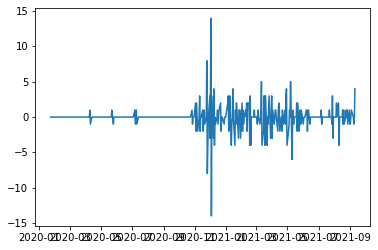

In [33]:
plt.plot(df_vt['VT_Conf_Cases_stationary'])
plt.show()

ADF test for confirmation
(test from second row on, as .diff() creates a NaN in the first row):

In [43]:
adfuller(df_vt['VT_Conf_Cases_stationary']['2020-01-23':])

(-8.882898981646642,
 1.3033909663175457e-14,
 14,
 407,
 {'1%': -3.4465195891135845,
  '5%': -2.8686676281678634,
  '10%': -2.5705668101226085},
 1376.0285739185256)

Now, all of the data appears stationary.